**Example**

The following example illustrates the complex exponential signal and its parameters. The Python module SymPy is used for this purpose. It provides functionality for symbolic variables and functions, as well as their calculus. The required symbolic variables need to be defined explicitly before usage. In the example  t ,  ω  and  σ  are defined as real-valued symbolic variables, followed by the definition of the exponential signal.
Now specific values for the complex frequency  s=σ+jω  are considered for illustration. For this purpose a new signal is defined by substituting both  σ  and  ω  with specific values. The real and imaginary part of the signal is plotted for illustration.

In [ ]:
import sympy as sym

sym.init_printing()

t,sigma,omega,tau = sym.symbols("t sigma omega tau", real = True)

s = sigma + 1j*omega
x = sym.exp(s*t)
x

 t⋅(1.0⋅ⅈ⋅ω + σ)
ℯ               

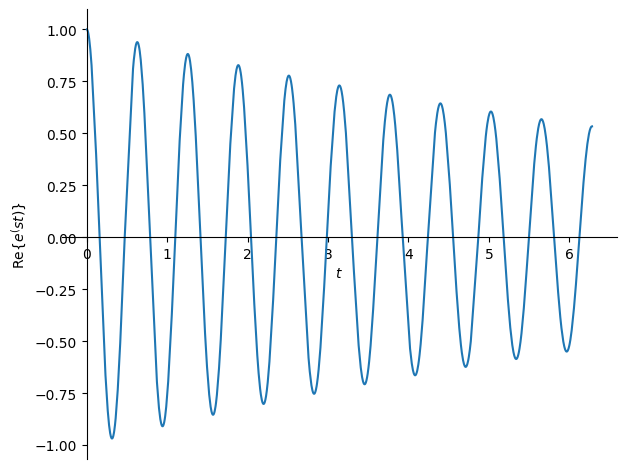

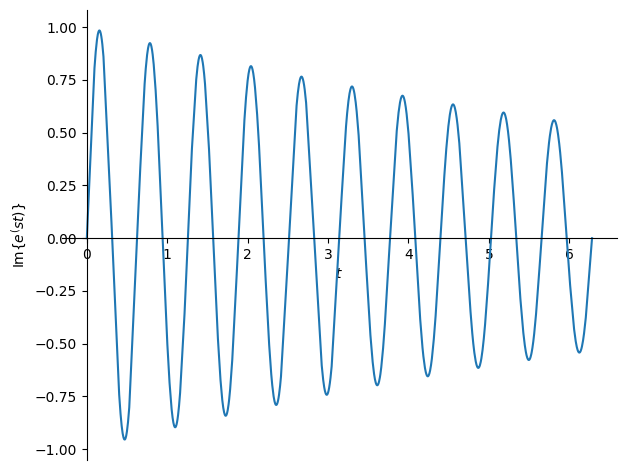

In [ ]:
y = x.subs({omega: 10, sigma: -0.1})

sym.plot(sym.re(y),(t,0,2*sym.pi),ylabel=r'Re{$e^(st)$}')
sym.plot(sym.im(y),(t,0,2*sym.pi),ylabel=r'Im{$e^(st)$}')


**Exercise**

* Try other values for `omega` and `sigma` to create signals with increasing/constant/decreasing amplitudes and different angular frequencies.

Para:
	omega = -10
	sigma:-0.1



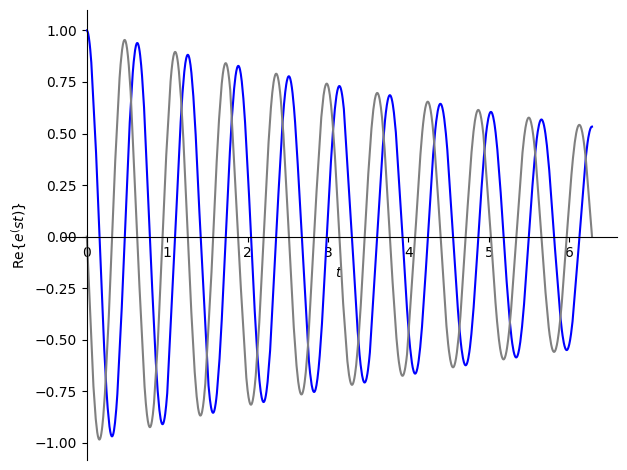

Para:
	omega = -10
	sigma:0.0



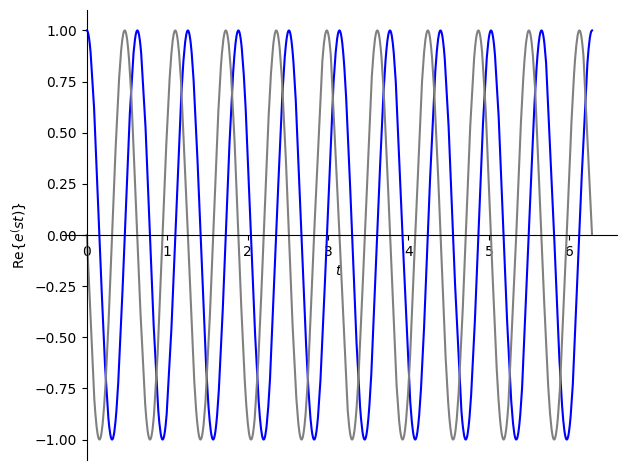

Para:
	omega = -10
	sigma:0.1



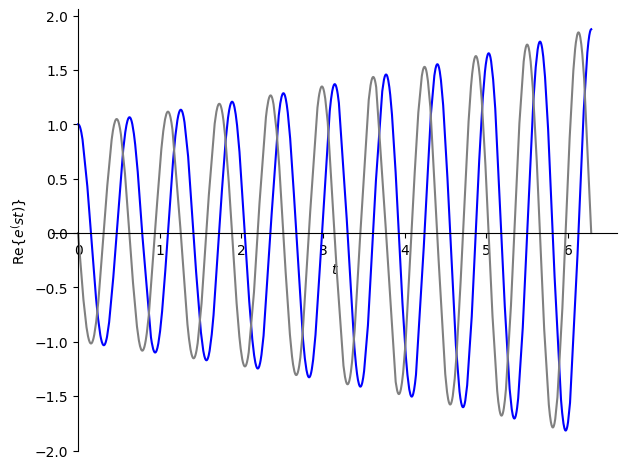

Para:
	omega = 0
	sigma:-0.1



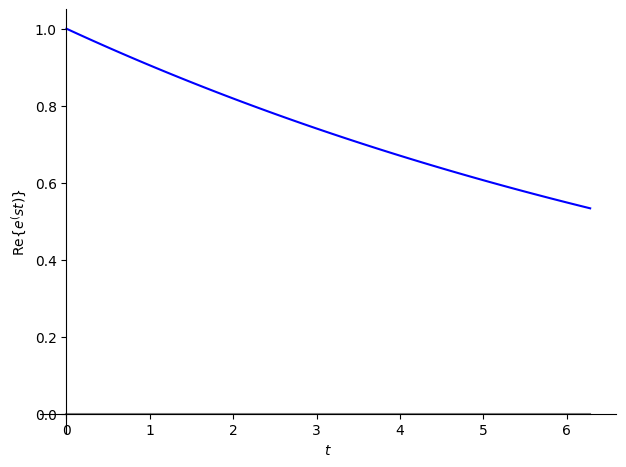

Para:
	omega = 0
	sigma:0.0



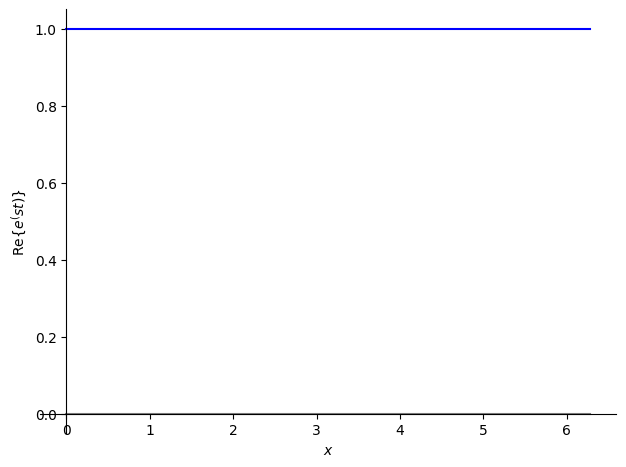

Para:
	omega = 0
	sigma:0.1



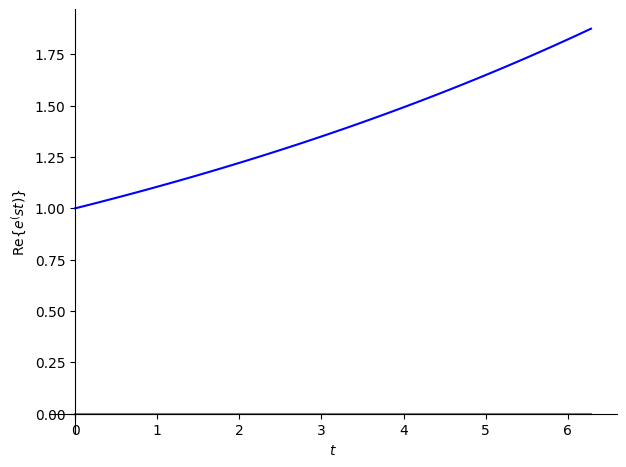

Para:
	omega = 10
	sigma:-0.1



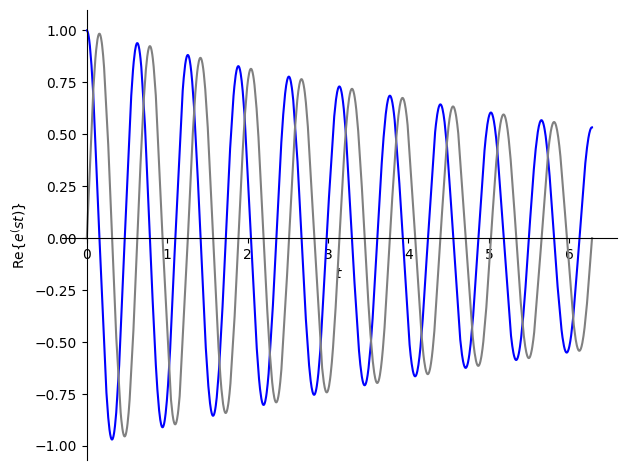

Para:
	omega = 10
	sigma:0.0



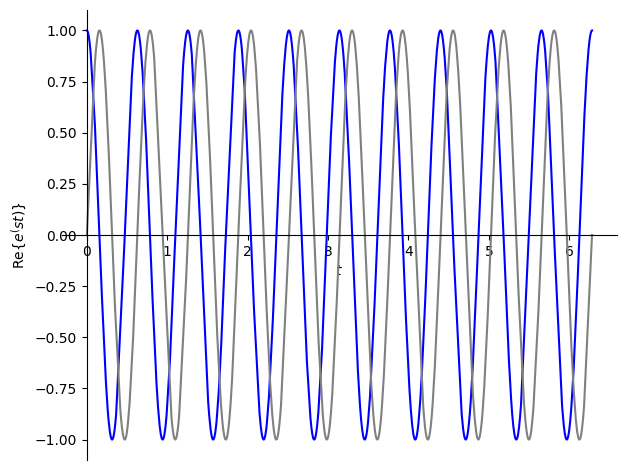

Para:
	omega = 10
	sigma:0.1



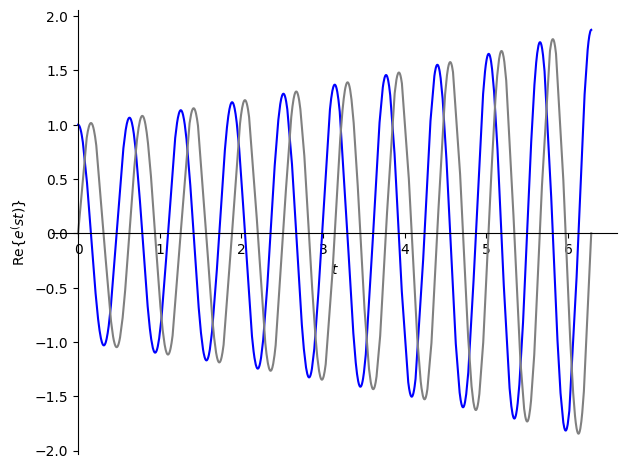

In [ ]:

for i in range(-10,20,10):
  for j in range(-1,2,1):
    e1 = x.subs({omega: i, sigma: j/10})
    print(f"Para:\n\tomega = {i}\n\tsigma:{j/10}\n")
    e1Re = sym.plot(sym.re(e1),(t,0,2*sym.pi),ylabel=r'Re{$e^(st)$}',line_color="blue",show = False)
    e1Im =sym.plot(sym.im(e1),(t,0,2*sym.pi),ylabel=r'Im{$e^(st)$}',line_color="gray",show = False)
    e1Re.extend(e1Im)
    e1Re.show()


Mediante esto podemos concluir que $\omega$ define la velocidad con la que varian las sinusuidales, por lo que si es 0 las funciones seran constantes.

Por el otro lado $\sigma$ nos define el crecimiento que la función experimentará, por lo que cuando valga 0 la función mantendrá valores constantes

**Example**

This example illustrates some of the basic properties of the Dirac impulse. Let's first define a Dirac impulse by way of the Dirac delta function

In [ ]:

delta = sym.DiracDelta(t)
delta


δ(t)

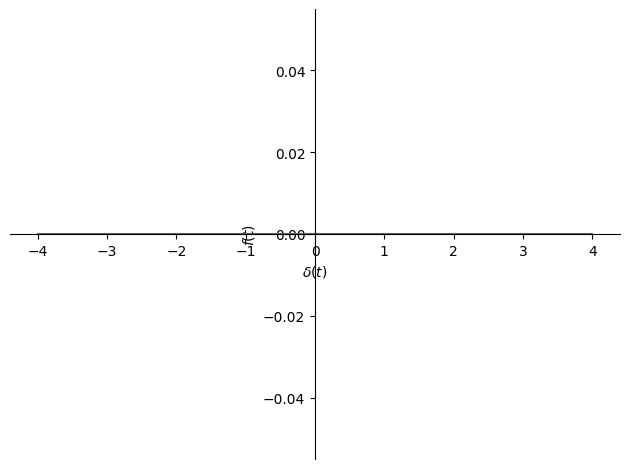

In [ ]:
sym.plot(delta,(t,-4,4),xlabel=r'$\delta(t)$')

Now let's check the sifting property by defining an arbitrary signal (function) $f(t)$ and integrating over its product with the Delta impulse

In [ ]:
f = sym.Function('f')(t)

sym.integrate(delta*f,(t,-sym.oo,sym.oo))

f(0)

**Exercise**

* Derive the sifting property for a shifted Dirac impulse $\delta(t-\tau)$ and check your results by modifying above example.

In [ ]:
deltaShift = delta.subs(t,t-tau)

sym.integrate(deltaShift*f,(t,-sym.oo,sym.oo))

f(τ)

**Example**

In the following, a Heaviside signal $\epsilon(t)$ is defined and plotted. Note that `Sympy` denotes the Heaviside function by $\theta(t)$.

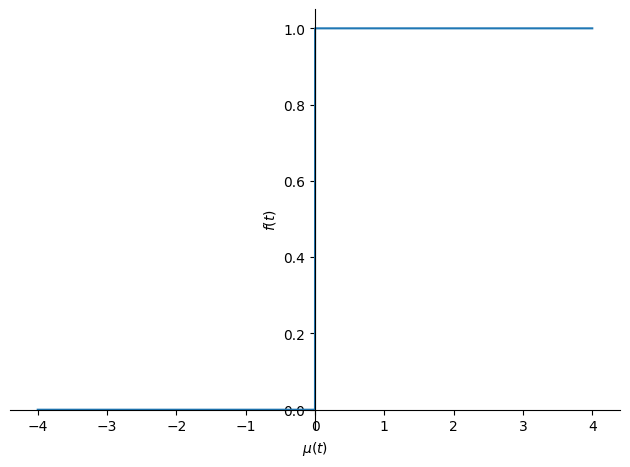

In [ ]:
stepInt = sym.integrate(delta,(t,-sym.oo,t))

sym.plot(stepInt,(t,-4,4),xlabel=r'$\mu(t)$')

In [ ]:
step = sym.Heaviside(t)
step

θ(t)

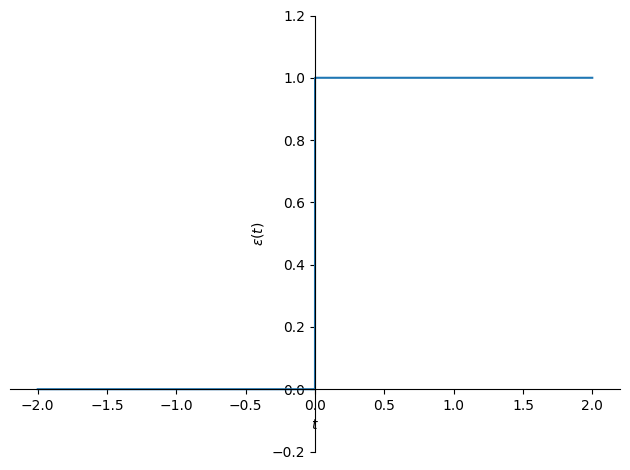

In [ ]:
sym.plot(step,(t,-2,2),ylim=[-0.2,1.2],ylabel='$\epsilon(t)$')

Let's construct a harmonic signal $\cos(\omega t)$ with $\omega=2$ which is switched on at $t=0$. Considering the definition of the Heaviside function, the desired signal is given as 

\begin{equation}
x(t) = \cos(\omega t) \cdot \epsilon(t)
\end{equation}

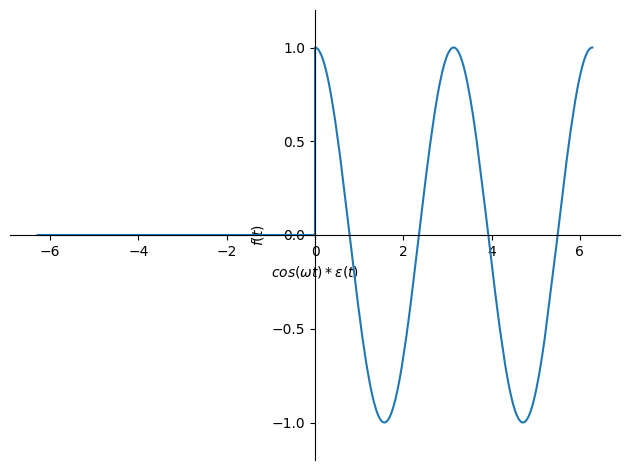

In [ ]:
x = step*sym.cos(omega*t)

sym.plot(x.subs(omega,2),(t,-2*sym.pi,2*sym.pi),ylim=[-1.2,1.2],xlabel='$cos(\omega t)*\epsilon(t)$')

**Example**

The Heaviside function is used to define a rectangular function in `Sympy`. This function is then used as rectangular signal.

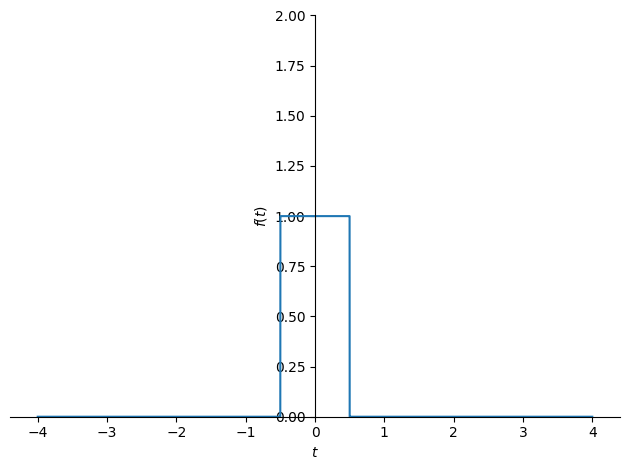

In [ ]:
class rect(sym.Function):

  @classmethod
  def eval(cls,arg):
    return sym.Heaviside(arg+1/2)-sym.Heaviside(arg-1/2)

x = rect(t)

sym.plot(x,(t,-4,4),ylim=[-0,2,1.2])

**Exercise**

* Use $\text{rect}(t)$ to construct a harmonic signal $\cos(\omega t)$ with $\omega=2$ which is switched on at $t=-\frac{1}{2}$ and switched off at $t=+\frac{1}{2}$.


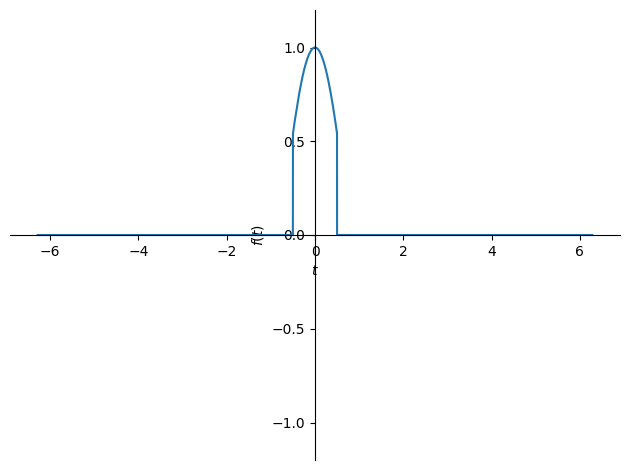

In [ ]:
e3 = sym.cos(omega*t)*rect(t)

sym.plot(e3.subs(omega,2),(t,-2*sym.pi,2*sym.pi),ylim=[-1.2,1.2])

**Example**

The following example illustrates the sign signal $\text{sgn}(t)$. Note that the sign function is represented as $\text{sign}(t)$ in `Sympy`.

In [ ]:
sgn = sym.sign(t)
sgn

sign(t)

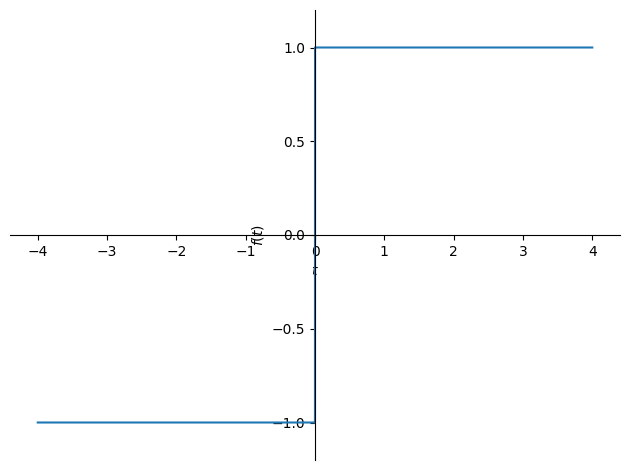

In [ ]:
sym.plot(sgn,(t,-4,4),ylim=[-1.2,1.2])

**Exercise**

* Check the values of $\text{sgn}(t)$ for $t \to 0^-$, $t = 0$ and $t \to 0^+$ as implemented in `SymPy`. Do they conform to above definition?

In [ ]:
e4L = sym.limit(sym.sign(t),t,0,'-')
e4R = sym.limit(sym.sign(t),t,0,'+')

print(f"Para 0 por la izquierda: {e4L}\nPara 0 por la derecha: {e4R}")

Para 0 por la izquierda: -1
Para 0 por la derecha: 1


Esto concuerda con la definición